In [1]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.shape

(5728, 2)

In [5]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [7]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [6]:
import seaborn as sns

In [9]:
sns.countplot(data['spam'])

<Axes: ylabel='count'>

Error in callback <function flush_figures at 0x0000024FDBDC9B20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [10]:
data.duplicated().sum()

33

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
data.shape

(5695, 2)

In [15]:
5728 - 33

5695

c:\python 3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='spam', ylabel='count'>

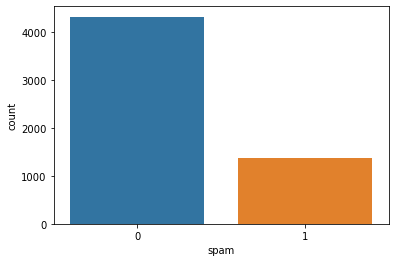

In [14]:
sns.countplot(data['spam'])

In [16]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

# Separate in X and Y

In [17]:
X = data['text'].values
y = data['spam'].values

In [18]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Train - Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [20]:
X_train.shape

(4556,)

In [21]:
X_test.shape

(1139,)

In [22]:
y_train.shape

(4556,)

In [23]:
y_test.shape

(1139,)

# Preprocessing 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer()


# Training by ML Algorithm

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [27]:
pipe = make_pipeline(cv, nb)

In [28]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [29]:
y_pred = pipe.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.990342405618964

In [31]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1], dtype=int64)

In [32]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))